In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !pip install kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle competitions download -c laptop-price

In [ ]:
# ! unzip laptop-price.zip -d laptop_price

In [ ]:
df = pd.read_csv('/content/Price_euros_train.csv')

In [ ]:
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
5,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
6,11,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.86kg,393.90
7,12,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,344.99
8,13,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,NaN,1.83kg,2439.97
9,14,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,498.90


In [ ]:
df.isna().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,11
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
df['Ram'] = pd.to_numeric(df['Ram'].str[:-2])

In [ ]:
df[['ProcessorType', 'Frequency']] = df['Cpu'].str.rsplit(n=1, expand = True)
print(df['Frequency'].unique())
df['Frequency'] = pd.to_numeric(df['Frequency'].str[:-3])
print(df['Weight'].unique())
df['Weight'] = pd.to_numeric(df['Weight'].str[:-2])
df['OpSys'] = df['OpSys'].str.split(' ', expand = True)[0]

['1.8GHz' '2.7GHz' '3.1GHz' '3GHz' '2.2GHz' '2.5GHz' '2GHz' '2.8GHz'
 '1.2GHz' '2.3GHz' '2.9GHz' '2.4GHz' '1.6GHz' '1.44GHz' '1.5GHz' '1.9GHz'
 '1.1GHz' '2.0GHz' '2.6GHz' '3.6GHz' '1.60GHz' '3.2GHz' '1.3GHz' '1.0GHz'
 '2.1GHz' '0.9GHz' '1.92GHz' '2.50GHz' '2.70GHz']
['1.34kg' '1.83kg' '1.37kg' '2.1kg' '2.04kg' '1.3kg' '1.86kg' '2.2kg'
 '0.92kg' nan '1.22kg' '0.98kg' '2.5kg' '1.62kg' '1.91kg' '1.35kg'
 '1.88kg' '2.71kg' '1.44kg' '2.8kg' '2kg' '2.65kg' '2.3kg' '2.77kg'
 '3.2kg' '0.69kg' '1.49kg' '2.4kg' '2.13kg' '2.43kg' '1.7kg' '1.4kg'
 '1.8kg' '1.9kg' '3kg' '2.7kg' '2.02kg' '1.63kg' '1.96kg' '1.21kg'
 '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg' '1.252kg' '1.58kg' '1.85kg'
 '1.23kg' '1.26kg' '2.16kg' '1.65kg' '2.36kg' '1.6kg' '2.05kg' '0.97kg'
 '2.9kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg' '2.03kg' '4.4kg'
 '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg' '1.12kg' '1.42kg' '3.35kg'
 '2.23kg' '1.2kg' '2.69kg' '2.37kg' '3.6kg' '2.08kg' '4.3kg' '1.68kg'
 '1.41kg' '4.14kg' '2.18kg' '2.67kg

In [ ]:
df_1 = df['ScreenResolution'].str.replace('x', ' ')
df_2 = df_1.str.split(' ')
height = pd.to_numeric(df_2.str[-2])
width = pd.to_numeric(df_2.str[-1])
df['Height'] = height
df['Width'] = width
df['ScreenType'] = df['ScreenResolution'].str.extract(r'^(.*?)(?=\d+x\d+|$)', expand=False).str.strip()

In [ ]:
def extract_size(storage, storage_type):
    regex = rf'(\d+(\.\d+)?)(TB|GB) {storage_type}'
    matches = df['Memory'].str.extractall(regex)
    sizes = matches[0].astype(float) * np.where(matches[2] == 'TB', 1024, 1)
    return sizes.groupby(level=0).sum()


df['Flash Storage'] = extract_size(df['Memory'], 'Flash Storage').reindex(df.index, fill_value=0)
df['Hybrid'] = extract_size(df['Memory'], 'Hybrid').reindex(df.index, fill_value=0)
df['SSD'] = extract_size(df['Memory'], 'SSD').reindex(df.index, fill_value=0)
df['HDD'] = extract_size(df['Memory'], 'HDD').reindex(df.index, fill_value=0)


In [ ]:
df['brand_cpu'] =  [x.split(' ')[0] for x in df['ProcessorType']]

df.drop(['Cpu'], axis=1, inplace=True)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,...,ProcessorType,Frequency,Height,Width,ScreenType,Flash Storage,Hybrid,SSD,HDD,brand_cpu
0,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,Intel Core i5,1.8,1440.0,900.0,,128.0,0.0,0.0,0.0,Intel
1,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,...,Intel Core i7,2.7,2880.0,1800.0,IPS Panel Retina Display,0.0,0.0,512.0,0.0,Intel
2,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,Intel Core i5,3.1,2560.0,1600.0,IPS Panel Retina Display,0.0,0.0,256.0,0.0,Intel
3,6,Acer,Aspire 3,Notebook,15.6,1366x768,4,500GB HDD,AMD Radeon R5,Windows,...,AMD A9-Series 9420,3.0,1366.0,768.0,,0.0,0.0,0.0,500.0,AMD
4,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac,...,Intel Core i7,2.2,2880.0,1800.0,IPS Panel Retina Display,256.0,0.0,0.0,0.0,Intel


In [ ]:
df['OpSys'].unique()

array(['macOS', 'Windows', 'Mac', 'No', nan, 'Linux', 'Android', 'Chrome'],
      dtype=object)

In [ ]:
df['OpSys'] = df['OpSys'].replace('Mac', 'macOs')

In [ ]:
df = df.drop(columns = ['laptop_ID', 'Product', 'Memory', 'TypeName', 'ProcessorType', 'ScreenResolution', 'ScreenType', 'Gpu'])

In [ ]:
df['OpSys'].fillna(df.groupby('Company')['OpSys'].transform(lambda x: x.mode()[0]), inplace = True)


<ipython-input-387-1b11749b1c41>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OpSys'].fillna(df.groupby('Company')['OpSys'].transform(lambda x: x.mode()[0]), inplace = True)


In [ ]:
# df['OpSys'].fillna(df['OpSys'].mode()[0], inplace = True)
# df['Weight'].fillna(df['Weight'].mode()[0], inplace = True)
# df['Height'].fillna(df['Height'].mode()[0], inplace = True)
# df['Width'].fillna(df['Width'].mode()[0], inplace = True)

#df['OpSys'].fillna(df['OpSys'].mode()[0], inplace = True)
df['Weight'].fillna(df['Weight'].median(), inplace = True)
df['Height'].fillna(df['Height'].median(), inplace = True)
df['Width'].fillna(df['Width'].median(), inplace = True)

<ipython-input-388-28b04d309539>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(df['Weight'].median(), inplace = True)
<ipython-input-388-28b04d309539>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
df.isna().sum()

,0
Company,0
Inches,0
Ram,0
OpSys,0
Weight,0
Price_euros,0
Frequency,0
Height,0
Width,0
Flash Storage,0


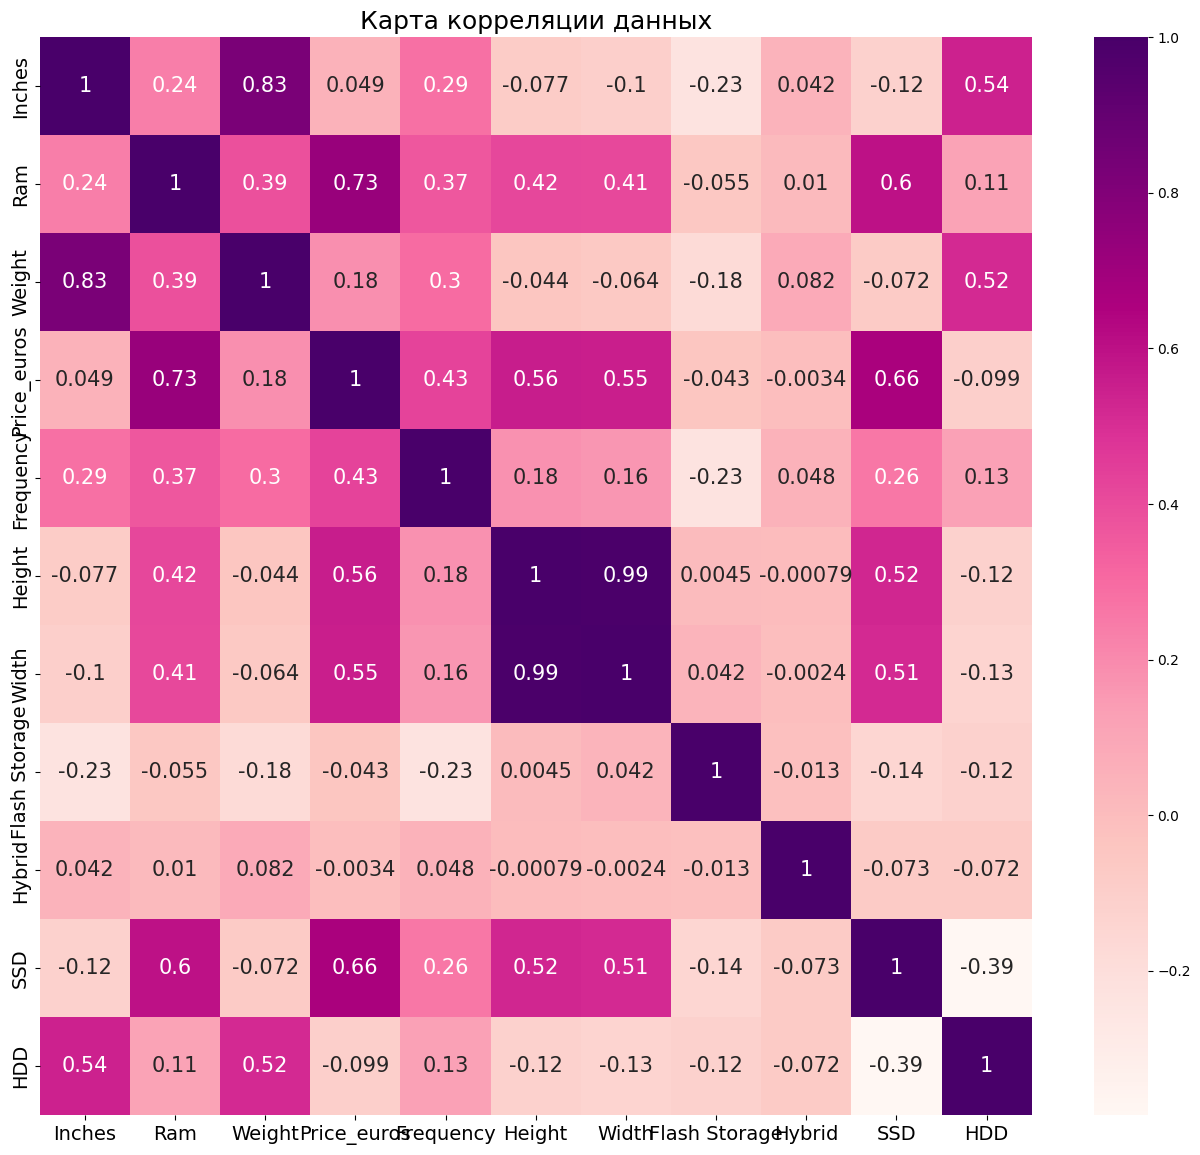

In [ ]:
plt.figure(figsize=(16, 14))
df1 = df.drop(columns = ['Company', 'OpSys', 'brand_cpu'])
dataplot = sns.heatmap(df1.corr(), cmap="RdPu", annot=True,annot_kws={'fontsize': 15})

plt.title("Карта корреляции данных", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [ ]:
!pip install category_encoders
from category_encoders import BinaryEncoder, OneHotEncoder

In [ ]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['OpSys'])

df_encoded = encoder.fit_transform(df['OpSys'])

# Получение названий закодированных столбцов
encoded_columns = encoder.get_feature_names_out(df['OpSys'])

df_encoded.columns = encoded_columns

df = pd.concat([df.drop('OpSys', axis=1), df_encoded], axis=1)

In [ ]:
encoder = ce.OneHotEncoder(cols=['Company'])

df_encoded = encoder.fit_transform(df['Company'])

# Получение названий закодированных столбцов
encoded_columns = encoder.get_feature_names_out(df['Company'])

df_encoded.columns = encoded_columns

df = pd.concat([df.drop('Company', axis=1), df_encoded], axis=1)

In [ ]:
bn = BinaryEncoder()

encoder = ce.OneHotEncoder(cols=['brand_cpu'])

df_encoded = encoder.fit_transform(df['brand_cpu'])

# Получение названий закодированных столбцов
encoded_columns = encoder.get_feature_names_out(df['brand_cpu'])

df_encoded.columns = encoded_columns

df = pd.concat([df.drop('brand_cpu', axis=1), df_encoded], axis=1)

In [ ]:
df.head()

,Inches,Ram,Weight,Price_euros,Frequency,Height,Width,Flash Storage,Hybrid,SSD,...,Company_12,Company_13,Company_14,Company_15,Company_16,Company_17,Company_18,brand_cpu_1,brand_cpu_2,brand_cpu_3
0,13.3,8,1.34,898.94,1.8,1440.0,900.0,128.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,15.4,16,1.83,2537.45,2.7,2880.0,1800.0,0.0,0.0,512.0,...,0,0,0,0,0,0,0,1,0,0
2,13.3,8,1.37,1803.60,3.1,2560.0,1600.0,0.0,0.0,256.0,...,0,0,0,0,0,0,0,1,0,0
3,15.6,4,2.10,400.00,3.0,1366.0,768.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,15.4,16,2.04,2139.97,2.2,2880.0,1800.0,256.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


# Масштабирование

In [ ]:
X = df.drop(['Price_euros'], axis=1)
y = df['Price_euros']

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_std = std.fit_transform(X)

X_std = pd.DataFrame(X_std, columns=X.columns)
X_std

,Inches,Ram,Weight,Frequency,Height,Width,Flash Storage,Hybrid,SSD,HDD,...,Company_12,Company_13,Company_14,Company_15,Company_16,Company_17,Company_18,brand_cpu_1,brand_cpu_2,brand_cpu_3
0,-1.221219,-0.071167,-1.064694,-0.976340,-0.927459,-0.602717,4.143846,-0.089237,-0.974547,-0.810748,...,-0.042524,-0.073788,-0.090495,-0.052105,-0.052105,-0.060193,-0.042524,0.226348,-0.224136,-0.030056
1,0.258515,1.505896,-0.316425,0.795916,2.027407,2.603663,-0.146663,-0.089237,1.767526,-0.810748,...,-0.042524,-0.073788,-0.090495,-0.052105,-0.052105,-0.060193,-0.042524,0.226348,-0.224136,-0.030056
2,-1.221219,-0.071167,-1.018882,1.583585,1.370770,1.891134,-0.146663,-0.089237,0.396489,-0.810748,...,-0.042524,-0.073788,-0.090495,-0.052105,-0.052105,-0.060193,-0.042524,0.226348,-0.224136,-0.030056
3,0.399442,-0.859699,0.095886,1.386668,-1.079306,-1.072986,-0.146663,-0.089237,-0.974547,0.131018,...,-0.042524,-0.073788,-0.090495,-0.052105,-0.052105,-0.060193,-0.042524,-4.417977,4.461576,-0.030056
4,0.258515,1.505896,0.004261,-0.188671,2.027407,2.603663,8.434355,-0.089237,-0.974547,-0.810748,...,-0.042524,-0.073788,-0.090495,-0.052105,-0.052105,-0.060193,-0.042524,0.226348,-0.224136,-0.030056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0.399442,-0.859699,0.248594,0.402081,-1.079306,-1.072986,-0.146663,-0.089237,-0.974547,0.131018,...,-0.042524,-0.073788,-0.090495,-0.052105,-0.052105,-0.060193,-0.042524,0.226348,-0.224136,-0.030056
1104,-0.727974,-0.859699,-0.362238,0.402081,0.057496,0.038559,-0.146663,-0.089237,-0.289029,-0.810748,...,-0.042524,-0.073788,-0.090495,-0.052105,-0.052105,-0.060193,-0.042524,0.226348,-0.224136,-0.030056
1105,-0.727974,-1.253965,-0.820362,-1.370175,-1.079306,-1.072986,1.998591,-0.089237,-0.974547,-0.810748,...,-0.042524,-0.073788,-0.090495,-0.052105,-0.052105,-0.060193,-0.042524,0.226348,-0.224136,-0.030056
1106,0.399442,-0.465433,0.233323,0.402081,-1.079306,-1.072986,-0.146663,-0.089237,-0.974547,1.117988,...,-0.042524,-0.073788,-0.090495,-0.052105,-0.052105,-0.060193,-0.042524,0.226348,-0.224136,-0.030056


In [ ]:
X_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Inches         1108 non-null   float64
 1   Ram            1108 non-null   float64
 2   Weight         1108 non-null   float64
 3   Frequency      1108 non-null   float64
 4   Height         1108 non-null   float64
 5   Width          1108 non-null   float64
 6   Flash Storage  1108 non-null   float64
 7   Hybrid         1108 non-null   float64
 8   SSD            1108 non-null   float64
 9   HDD            1108 non-null   float64
 10  OpSys_1        1108 non-null   float64
 11  OpSys_2        1108 non-null   float64
 12  OpSys_3        1108 non-null   float64
 13  OpSys_4        1108 non-null   float64
 14  OpSys_5        1108 non-null   float64
 15  OpSys_6        1108 non-null   float64
 16  OpSys_7        1108 non-null   float64
 17  Company_1      1108 non-null   float64
 18  Company_

# Обучение

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (775, 38), (775,)
Test dataset size: (333, 38), (333,)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(X_test, y_test))

MAE 281.2271494326988
MSE 178524.83898583485
R2 Score: 0.684612205165219


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X, y, cv=kf, scoring='r2')
mean_score = np.mean(scores)
mean_score

0.6980301197774681

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()

catboost.fit(X_train, y_train)

y_pred_cat = catboost.predict(X_test)

print("MAE", metrics.mean_absolute_error(y_test, y_pred_cat))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", model.score(X_test, y_test))

Learning rate set to 0.039327
0:	learn: 642.6798302	total: 712us	remaining: 711ms
1:	learn: 629.9732863	total: 1.8ms	remaining: 896ms
2:	learn: 617.3394205	total: 2.89ms	remaining: 961ms
3:	learn: 604.3313978	total: 4.04ms	remaining: 1.01s
4:	learn: 592.0283608	total: 5.05ms	remaining: 1s
5:	learn: 580.0238466	total: 6.48ms	remaining: 1.07s
6:	learn: 569.8781168	total: 7.49ms	remaining: 1.06s
7:	learn: 558.6576542	total: 8.49ms	remaining: 1.05s
8:	learn: 547.7076320	total: 9.99ms	remaining: 1.1s
9:	learn: 537.3841426	total: 11ms	remaining: 1.09s
10:	learn: 527.7759785	total: 12ms	remaining: 1.07s
11:	learn: 518.9181378	total: 12.9ms	remaining: 1.06s
12:	learn: 509.3207900	total: 14.1ms	remaining: 1.07s
13:	learn: 500.8270351	total: 15.4ms	remaining: 1.09s
14:	learn: 492.5483736	total: 16.6ms	remaining: 1.09s
15:	learn: 484.6717767	total: 17.7ms	remaining: 1.09s
16:	learn: 476.6196161	total: 18.7ms	remaining: 1.08s
17:	learn: 470.0590495	total: 19.7ms	remaining: 1.07s
18:	learn: 463.316

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for cross-validation
k = 14
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(catboost, X, y, cv=kf, scoring='r2')
mean_score = np.mean(scores)
mean_score

Выходные данные были обрезаны до нескольких последних строк (5000).
4:	learn: 619.9742865	total: 7.33ms	remaining: 1.46s
5:	learn: 606.5982557	total: 8.28ms	remaining: 1.37s
6:	learn: 594.0169404	total: 9.22ms	remaining: 1.31s
7:	learn: 582.4067401	total: 10.2ms	remaining: 1.26s
8:	learn: 571.4454607	total: 11.1ms	remaining: 1.22s
9:	learn: 560.9079155	total: 12ms	remaining: 1.19s
10:	learn: 550.1102511	total: 13ms	remaining: 1.17s
11:	learn: 540.5571619	total: 14ms	remaining: 1.15s
12:	learn: 531.4862656	total: 15ms	remaining: 1.14s
13:	learn: 521.9195621	total: 16ms	remaining: 1.12s
14:	learn: 513.1544780	total: 17.2ms	remaining: 1.13s
15:	learn: 503.8591791	total: 18.4ms	remaining: 1.13s
16:	learn: 494.7070341	total: 19.2ms	remaining: 1.11s
17:	learn: 487.2207468	total: 20.3ms	remaining: 1.11s
18:	learn: 480.8559234	total: 21.6ms	remaining: 1.11s
19:	learn: 474.6697831	total: 22.3ms	remaining: 1.09s
20:	learn: 468.3732350	total: 23.3ms	remaining: 1.08s
21:	learn: 461.6753695	total: 

0.8024053821916296

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forrest = RandomForestRegressor()

forrest.fit(X_train, y_train)

y_pred_forrest = forrest.predict(X_test)
print("MAE", metrics.mean_absolute_error(y_test, y_pred_forrest))
print("MSE", metrics.mean_squared_error(y_test,y_pred_forrest))
print("R2 Score:", model.score(X_test, y_test))

MAE 227.7805124696125
MSE 141703.25085443814
R2 Score: 0.684612205165219


In [ ]:

k = 17
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(forrest, X, y, cv=kf, scoring='r2')
mean_score = np.mean(scores)
mean_score


0.7916710336688745

In [ ]:
grad = ExtraTreesRegressor()

grad.fit(X_train, y_train)

y_grad = grad.predict(X_test)

In [ ]:
k = 14
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(grad, X, y, cv=kf, scoring='r2')
mean_score = np.mean(scores)
mean_score

0.7593048329718073

Тестовые данные

In [ ]:
df1 = pd.read_csv('/content/Price_euros_test.csv')

In [ ]:
df1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,86,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5,Windows 10,2.1kg
1,1249,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg
2,122,Asus,VivoBook S15,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg
3,993,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99kg
4,739,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.25kg


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         195 non-null    int64  
 1   Company           195 non-null    object 
 2   Product           195 non-null    object 
 3   TypeName          195 non-null    object 
 4   Inches            195 non-null    float64
 5   ScreenResolution  193 non-null    object 
 6   Cpu               195 non-null    object 
 7   Ram               195 non-null    object 
 8   Memory            195 non-null    object 
 9   Gpu               195 non-null    object 
 10  OpSys             183 non-null    object 
 11  Weight            191 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 18.4+ KB


In [ ]:
df1['Ram'] = pd.to_numeric(df1['Ram'].str[:-2])
df1[['ProcessorType', 'Frequency']] = df1['Cpu'].str.rsplit(n=1, expand = True)
df1['Frequency'] = pd.to_numeric(df1['Frequency'].str[:-3])
df1['Weight'] = pd.to_numeric(df1['Weight'].str[:-2])
df1_1 = df1['ScreenResolution'].str.replace('x', ' ')
df1_2 = df1_1.str.split(' ')
height = pd.to_numeric(df1_2.str[-2])
width = pd.to_numeric(df1_2.str[-1])
df1['Height'] = height
df1['Width'] = width

def extract_size(storage, storage_type):
    regex = rf'(\d+(\.\d+)?)(TB|GB) {storage_type}'
    matches = df1['Memory'].str.extractall(regex)
    sizes = matches[0].astype(float) * np.where(matches[2] == 'TB', 1024, 1)
    return sizes.groupby(level=0).sum()


df1['Flash Storage'] = extract_size(df1['Memory'], 'Flash Storage').reindex(df.index, fill_value=0)
df1['Hybrid'] = extract_size(df1['Memory'], 'Hybrid').reindex(df.index, fill_value=0)
df1['SSD'] = extract_size(df1['Memory'], 'SSD').reindex(df.index, fill_value=0)
df1['HDD'] = extract_size(df1['Memory'], 'HDD').reindex(df.index, fill_value=0)

df1['ScreenType'] = df1['ScreenResolution'].str.extract(r'^(.*?)(?=\d+x\d+|$)', expand=False).str.strip()

df1['brand_cpu'] =  [x.split(' ')[0] for x in df1['ProcessorType']]
df1.drop(['Cpu'], axis=1, inplace=True)

df1 = df1.drop(columns = ['laptop_ID', 'Product', 'Memory', 'Gpu', 'TypeName', 'ProcessorType', 'ScreenResolution', 'ScreenType'])
df1['OpSys'].fillna(df1['OpSys'].mode()[0], inplace = True)
df1['Weight'].fillna(df1['Weight'].median(), inplace = True)
df1['Height'].fillna(df1['Height'].median(), inplace = True)
df1['Width'].fillna(df1['Width'].median(), inplace = True)

encoder = ce.OneHotEncoder(cols=['OpSys'])
df1_encoded = encoder.fit_transform(df1['OpSys'])
# Получение названий закодированных столбцов
encoded_columns = encoder.get_feature_names_out(df1['OpSys'])
df1_encoded.columns = encoded_columns
df1 = pd.concat([df1.drop('OpSys', axis=1), df1_encoded], axis=1)
encoder = ce.OneHotEncoder(cols=['Company'])
df1_encoded = encoder.fit_transform(df1['Company'])
# Получение названий закодированных столбцов
encoded_columns = encoder.get_feature_names_out(df1['Company'])
df1_encoded.columns = encoded_columns
df1 = pd.concat([df1.drop('Company', axis=1), df1_encoded], axis=1)
encoder = ce.OneHotEncoder(cols=['brand_cpu'])
df1_encoded = encoder.fit_transform(df1['brand_cpu'])
# Получение названий закодированных столбцов
encoded_columns = encoder.get_feature_names_out(df1['brand_cpu'])
df1_encoded.columns = encoded_columns
df1 = pd.concat([df1.drop('brand_cpu', axis=1), df1_encoded], axis=1)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std1 = std.fit_transform(df1)
X_std1 = pd.DataFrame(X_std1, columns=df1.columns)


<ipython-input-334-3dc5f572c1a9>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['OpSys'].fillna(df1['OpSys'].mode()[0], inplace = True)
<ipython-input-334-3dc5f572c1a9>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
X_std1.head()

,Inches,Ram,Weight,Frequency,Height,Width,Flash Storage,Hybrid,SSD,HDD,...,Company_7,Company_8,Company_9,Company_10,Company_11,Company_12,Company_13,Company_14,brand_cpu_1,brand_cpu_2
0,0.461410,-0.876417,0.082407,1.379441,-1.056886,-1.058035,-0.171281,-0.125,-0.998822,1.274723,...,-0.071796,-0.523937,-0.232495,-0.192961,-0.144715,-0.071796,-0.071796,-0.071796,4.546061,-4.546061
1,-0.635009,1.459364,-0.138165,0.976338,0.042074,0.022448,-0.171281,-0.125,4.226622,-0.743487,...,-0.071796,-0.523937,-0.232495,-0.192961,-0.144715,-0.071796,-0.071796,-0.071796,-0.219971,0.219971
2,0.461410,-0.097823,-0.505785,-1.039180,0.042074,0.022448,-0.171281,-0.125,0.307539,-0.743487,...,-0.071796,-0.523937,-0.232495,-0.192961,-0.144715,-0.071796,-0.071796,-0.071796,-0.219971,0.219971
3,1.626355,1.459364,1.391134,0.976338,0.042074,0.022448,-0.171281,-0.125,0.307539,1.274723,...,-0.071796,-0.523937,-0.232495,-0.192961,-0.144715,-0.071796,-0.071796,-0.071796,-0.219971,0.219971
4,0.461410,0.680770,0.302979,0.371682,-1.056886,-1.058035,-0.171281,-0.125,-0.998822,1.274723,...,-0.071796,-0.523937,-0.232495,-0.192961,-0.144715,-0.071796,-0.071796,-0.071796,-0.219971,0.219971


In [ ]:
X_std1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Inches         195 non-null    float64
 1   Ram            195 non-null    float64
 2   Weight         195 non-null    float64
 3   Frequency      195 non-null    float64
 4   Height         195 non-null    float64
 5   Width          195 non-null    float64
 6   Flash Storage  195 non-null    float64
 7   Hybrid         195 non-null    float64
 8   SSD            195 non-null    float64
 9   HDD            195 non-null    float64
 10  OpSys_1        195 non-null    float64
 11  OpSys_2        195 non-null    float64
 12  OpSys_3        195 non-null    float64
 13  OpSys_4        195 non-null    float64
 14  OpSys_5        195 non-null    float64
 15  OpSys_6        195 non-null    float64
 16  OpSys_7        195 non-null    float64
 17  OpSys_8        195 non-null    float64
 18  Company_1 

In [ ]:
X_std1.insert(18, 'OpSys_9', 0)
X_std1.insert(33, 'Company_15', 0)
X_std1.insert(34, 'Company_16', 0)
X_std1.insert(35, 'Company_17', 0)
X_std1.insert(36, 'Company_18', 0)

In [ ]:
X_std1.insert(39, 'brand_cpu_3', 0)

In [ ]:
X_std1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Inches         195 non-null    float64
 1   Ram            195 non-null    float64
 2   Weight         195 non-null    float64
 3   Frequency      195 non-null    float64
 4   Height         195 non-null    float64
 5   Width          195 non-null    float64
 6   Flash Storage  195 non-null    float64
 7   Hybrid         195 non-null    float64
 8   SSD            195 non-null    float64
 9   HDD            195 non-null    float64
 10  OpSys_1        195 non-null    float64
 11  OpSys_2        195 non-null    float64
 12  OpSys_3        195 non-null    float64
 13  OpSys_4        195 non-null    float64
 14  OpSys_5        195 non-null    float64
 15  OpSys_6        195 non-null    float64
 16  OpSys_7        195 non-null    float64
 17  OpSys_8        195 non-null    float64
 18  OpSys_9   

In [ ]:
X_test = X_std1
y_pred = model.predict(X_test)
y_pred

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- OpSys_8
- OpSys_9


In [ ]:
answer = pd.DataFrame()

answer['Price_euros'] = y_pred

answer

In [ ]:
answer.rename_axis('index', inplace=True)
answer

In [ ]:
answer.to_csv('result.csv')